## Carga de datos

**Estructura del directorio del conjunto de datos de la imagen**:

**Nota: Los nombres de los directorios y sub-directorios que se muestran aquí son sólo para propósitos de explicación que pueden diferir del código.

Supongamos que tenemos un directorio principal (carpeta) de las imágenes, entonces podemos subdividirlo en subdirectorios (subcarpetas) de imágenes de "entrenamiento" (*training*), "validación" (*validation*) y "prueba" (*testing*). 

Entonces los directorios de "Entrenamiento" contienen sub-directorios(sub-carpetas) llamados "infectados" (*infected*) y "No infectados" (*uninfected*))que contienen imágenes apropiadas en los respectivos sub-directorios.

Del mismo modo, los directorios de "validación" y "prueba" también contienen subdirectorios (subcarpetas) denominados "infectado" y "no infectado" que contienen las imágenes adecuadas en los respectivos subdirectorios.


**Entrenamiento**: Las imágenes de este directorio se utilizarán para el entrenamiento de los datos.

**Validación**: Las imágenes de este directorio se utilizarán para validar el entrenamiento del modelo. El conjunto de datos de validación nos permite ver lo bien que los datos generalizan la clasificación.

**Prueba**: Las imágenes de este directorio se utilizarán para probar lo bien que se ha entrenado el modelo.


<img src="https://drive.google.com/uc?id=1-AMSvB19tME043-_oC9BQJIydiVCuukb" width= 600>



In [ ]:
!git clone https://github.com/procodingclass/PRO-M3-Pneumothorax-Image-Dataset

Cloning into 'PRO-M3-Pneumothorax-Image-Dataset'...
remote: Enumerating objects: 637, done.
remote: Total 637 (delta 0), reused 0 (delta 0), pack-reused 637
Receiving objects: 100% (637/637), 231.39 MiB | 18.99 MiB/s, done.
Resolving deltas: 100% (9/9), done.
Checking out files: 100% (601/601), done.


## Procesamiento de imagen

1. Convertir cada imagen en una matriz.
2. Mapear las etiquetas de cada imagen.
3. Aumentar cada imagen.

### Procesamiento de imagen: Mapear cada imagen con etiquetas

<center><b>Mapear cada imagen con etiquetas</b><br><img src="https://drive.google.com/uc?id=1_b1xd8UxuouE3zoTwzRxq3zPxzsnTF0U" width= 1000>

### Procesamiento de imagen: Aumento de datos

Algunas técnicas de aumento de datos:

*   Rotación de imagen.
*   Desplazamiento de la altura y ancho de la imagen.
*   Giro horizontal y vertical de la imagen.
*   Cambio de tamaño de la imagen.
*   Zoom de la imagen.


<img src="https://drive.google.com/uc?id=1WiQYLCyavp0KlCXoHYIRT5KrjNLLR-Um" width= 400>











#### Entrenamiento de datos

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img


# Aumento de datos aleatorio (Cambio de tamaño, rotación, giros, zoom, transformaciones) usando ImageDataGenerator 
training_data_generator = ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')


# Directorio de la imagen
training_image_directory = "/content/PRO-M3-Pneumothorax-Image-Dataset/training_dataset"

# Generación de aumento de datos procesados
training_augmented_images = training_data_generator.flow_from_directory(
    training_image_directory,
    target_size=(180,180))

Found 200 images belonging to 2 classes.


#### Validation Data

In [ ]:
# Aumento de datos aleatorio (cambio de tamaño) usando ImageDataGenerator
validation_data_generator = ImageDataGenerator(rescale = 1.0/255)

# Directorio de la imagen
validation_image_directory = "/content/PRO-M3-Pneumothorax-Image-Dataset/validation_dataset"

# Generación de aumento de datos procesados
validation_augmented_images = validation_data_generator.flow_from_directory(
    validation_image_directory,
    target_size=(180,180))

Found 200 images belonging to 2 classes.


#### Etiquetas de las clases

In [ ]:
training_augmented_images.class_indices

{'infected': 0, 'uninfected': 1}

##  Arquitectura de las redes neuronales convolucionales
Un modelo CNN consiste de:

1. **Capas de aprendizaje de características**:

   1.1 Capas de convolución + capas de activación (RELU).

   1.2 Capas de agrupación o *pooling*

2. **Capas de clasificación**:

   2.1 Capas para aplanar.

   2.2 Capas completamente conectadas (densas) 

   2.3 Capas completamente conectadas (densas) con Softmax




<img src="https://drive.google.com/uc?id=1OD6XteFaDvTTliIDn2xa6pP_iH_gk1xO" width= 1500>


**Visualización de la extracción de características(convolución + Relu)**

La convolución es un cálculo matemático entre dos matrices, la matriz de imágenes y la matriz de filtros, que da una nueva matriz de imágenes.


Visualmente podemos entender que el detector de características/filtro se mueve sobre la imagen para extraer características de la misma.



[<img src="https://drive.google.com/uc?id=1Sw7iKlkJbP_PCt6tNwhwc3VVQupG7YOi" width= 500>](https://)


## Matemáticamente:

**Conv2D Layer**

La convolución es un cálculo matemático entre dos matrices 2D, la matriz de imágenes y la matriz de filtros, que da lugar a una nueva matriz de imágenes.

Se toma una porción de la matriz de la imagen de entrada, llamada submatriz (de tamaño igual al tamaño del filtro), empezando por la parte superior izquierda.

Esta submatriz se multiplica por la matriz del filtro. Podemos multiplicar una matriz con otra, multiplicando el primer elemento por el primer elemento de ambas matrices (el segundo elemento por el segundo elemento de ambas matrices y así sucesivamente).

Después de multiplicar, el resultado se suma, lo que da el valor del 1er elemento de la nueva matriz de imagen.

Luego nos desplazamos hacia la derecha en una columna y repetimos los pasos anteriores para obtener el valor del segundo elemento de la nueva matriz.

Una vez terminada toda la fila, nos desplazamos una fila hacia abajo y repetimos los pasos anteriores para obtener el valor de todos los elementos de la nueva matriz, uno por uno.

Todo el proceso se repite con diferentes filtros, para obtener diferentes salidas, que en conjunto es la salida de la 1ª capa Conv2D.

Estas salidas de la 1ª capa Conv2D se dan a la 2ª capa Conv2D y se realizan las convoluciones.

Esto se repite para todas las capas del modelo CNN.



<img src="https://drive.google.com/uc?id=1IRxv0-ZJb1Rm7VAS08Q29fLB0RpCTCSw" width= 800>


**ReLU**

ReLU se define como una función, y= f(x) tal que asigna x para todos los valores x > 0 y 0 para todos los valores x<0.

<img src="https://drive.google.com/uc?id=1p_1QMI8B926gbChOaqBHGioxW38vMhSw" width= 600>


**MaxPooling2D**

Primero, hay una matriz de entrada (por ejemplo, 4x4) y otra matriz de un tamaño específico (por ejemplo 2x2) a la que se le conoce como pool. El tamaño de la matriz pool siempre es menor que el tamaño de la matriz de entrada.
Pool se suele usar para recursos que se almacenan listos para ser usados, en lugar de ser adquiridos y liberados después.

Luego, el valor máximo se toma de la sub-matriz que tenga igual tamaño que la matriz pool.

El resultado después de aplicar Max Pooling será la nueva matriz con tamaño igual a la mitad del tamaño de la matriz de entrada original

Dado que nuestra matriz de entrada es de 4x4, después del max pooling, la nueva matriz será 2x2, lo que reduce la dimensión de la matriz.



<img src="https://drive.google.com/uc?id=1YN6RSi6HxDj9tCgQTSm-sP6wUrJ7Iu-D" width= 800>



## Definir el modelo de red neuronal convolucional (CNN)

In [ ]:
model = tf.keras.models.Sequential([
    
    # 1a Capa de convolución y capa pooling 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(180, 180, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # 2a Capa de convolución y capa pooling
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # 3a Capa de convolución y capa pooling
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # 4a Capa de convolución y capa pooling
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Aplanar los resultados para ingresarlos a la capa densa
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    # Capa de clasificación
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

## Resumen del modelo

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 128)      0

## Visualización de las salidas intermedias de las capas de convolución


Podemos ver la salida de las **4 capas convolucionales** (conv2d, conv2d_1, conv2d_2, conv2d_3) con capas de  **max pooling** (max_pooling2d, max_pooling2d_1, max_pooling2d_2, max_pooling2d_3)

**Nota: Esta imagen está creada solo con fines explicativos.**

Al comienzo de una red convolucional, el filtro (detector de características/kernel) detecta patrones simples, como líneas horizontales, líneas verticales y esquinas, formas simples. 

En las capas posteriores de la red, los filtros (detector de características/kernel) son complejos que detectan formas, objetos y otras estructuras complejas, lo que se hace utilizando la característica anteriormente generada y sus características simples detectadas, para construir otras más complejas. 


*Nota: A medida que profundizamos en las capas, las características se vuelven cada vez más complejas y, por lo tanto, menos interpretables visualmente. Se comienzan a programar conceptos de nivel superior, como bordes, esquinas y ángulos únicos. Las presentaciones superiores llevan cada vez menos información sobre los contenidos visuales de la imagen, y cada vez más información relacionada con la clase de la imagen, por lo que las salidas de la capa densa no se mostrarán para una explicación visual.*



<img src="https://s3-whjr-curriculum-uploads.whjr.online/b941c8bd-c137-449f-ae8f-7233735a7845.jpg" width= 800>



## Modelo de compilación

Antes de entrenar el modelo, necesitamos compilarlo. Compilamos el modelo utilizando el método compile() (Keras).

El método compile puede tomar muchos argumentos, pero pasaremos los tres argumentos que deben especificarse. Los argumentos son:

1.	Optimizadores.

2.	Función de pérdida.

3.	Métricas para la predicción.

<img src="https://drive.google.com/uc?id=1RtOtl7uckZtdY5CQLvIzG49-8_ZM1FYj" width= 500>

**Necesidad de la compilación del modelo**

Cuando el modelo está entrenado casi nunca ocurre que sea 100% eficiente; es decir que no siempre puede predecir la clase de la imagen correctamente.

Esto lleva al concepto de pérdida durante el entrenamiento del modelo, que nos dice qué tan mal está funcionando el modelo.

Por lo tanto, necesitamos usar las funciones de pérdida (estas son funciones de cálculo matemático) para obtener el valor de la pérdida.

Por ejemplo, el resultado de la función de pérdida da un valor de 0.45, esto significa que el 45 % (0.45 x 100) de las veces, el modelo predecirá resultados incorrectos, ¡y solo el 55% de las veces predecirá los resultados correctos!

Eso significa que debemos tratar de minimizar el valor de la función de pérdida, porque un valor de pérdida más bajo significa que nuestro modelo va a funcionar mejor. El proceso de minimizar (o maximizar) el valor de una función/expresión matemática se denomina optimización.

<br><img src="https://drive.google.com/uc?id=1wfmlzJ5hAjL8T2nkkwSDIe_IVmhh97PL" width= 400>

### Compilar modelo

In [ ]:

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Ajustar y guardar el modelo

In [ ]:
history = model.fit(training_augmented_images, epochs=20, validation_data = validation_augmented_images, verbose=True)

model.save("Pneumothorax.h5")

Epoch 1/20
7/7 [==============================] - 31s 4s/step - loss: 0.7114 - accuracy: 0.4350 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/20
7/7 [==============================] - 28s 4s/step - loss: 0.6994 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 3/20
7/7 [==============================] - 29s 5s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 4/20
7/7 [==============================] - 28s 4s/step - loss: 0.6933 - accuracy: 0.4850 - val_loss: 0.6930 - val_accuracy: 0.5100
Epoch 5/20
7/7 [==============================] - 27s 4s/step - loss: 0.6934 - accuracy: 0.5100 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 6/20
7/7 [==============================] - 28s 4s/step - loss: 0.6942 - accuracy: 0.5000 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 7/20
7/7 [==============================] - 28s 4s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 8/20
7/7 [==================

## Ejecutar/Probar el modelo
 #### Predecir la clase de la imagen que no ha sido vista.

In [ ]:
training_augmented_images.class_indices

{'infected': 0, 'uninfected': 1}

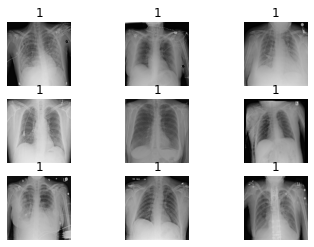

In [ ]:
import os
import numpy as np

from matplotlib import pyplot
from matplotlib.image import imread

import tensorflow
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.preprocessing.image import img_to_array

# Directorio de la imagen de prueba
testing_image_directory = '/content/PRO-M3-Pneumothorax-Image-Dataset/testing_dataset/infected'

# Todos los archivos de imagen en el directorio
img_files = os.listdir(testing_image_directory)

i= 0

# Bucle para 9 archivos de imagen
for file in img_files[51:60]:

  # Ruta completa de la imagen
  img_files_path = os.path.join(testing_image_directory, file)

  # Cargar imagen 
  img_1 = load_img(img_files_path,target_size=(180, 180))

  # Convertir la imagen en matriz
  img_2 = img_to_array(img_1)

  # Aumentar la dimensión
  img_3 = np.expand_dims(img_2, axis=0)
  
  # Predecir la clase de la imagen que no se ha visto
  prediction = model.predict(img_3)
  # print(prediction)

  predict_class = np.argmax(prediction, axis=1)
  # print(predict_class)

  # Graficar la imagen usando subplot
  pyplot.subplot(3, 3, i+1)
  pyplot.imshow(img_2.astype('uint8'))
  
  # Agregar título a la imagen como el valor de la clase predecida
  pyplot.title(predict_class[0])

  # No mostrar los ejes x, y en la imagen
  pyplot.axis('off')

  i=i+1

pyplot.show()

##Actividad adicional

## Curva de precisión 

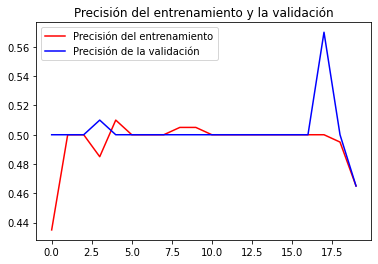

In [ ]:
from matplotlib import pyplot

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# print(acc)
# print(val_acc)

epochs = range(len(acc))

pyplot.plot(epochs, acc, 'r', label='Precisión del entrenamiento')
pyplot.plot(epochs, val_acc, 'b', label='Precisión de la validación')

pyplot.title('Precisión del entrenamiento y la validación')

pyplot.legend()

pyplot.show()